In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
DATASET_PATH = r"C:\Users\asus\Desktop\BRAIN_PRJCT_CNN\data image"


In [8]:
#  Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    validation_split=0.1  # 10% of training data for validation
)

#  Training data
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "\\Training",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

#  Validation data
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "\\Training",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

#  Test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    DATASET_PATH + "\\Testing",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
#  CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(512,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: Glioma, Meningioma, Pituitary, No Tumor
])

#  Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
model.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 81s 491ms/step - accuracy: 0.5326 - loss: 1.0269 - val_accuracy: 0.6415 - val_loss: 0.9190
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 78s 481ms/step - accuracy: 0.6724 - loss: 0.7955 - val_accuracy: 0.6573 - val_loss: 0.8406
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 77s 479ms/step - accuracy: 0.7241 - loss: 0.6860 - val_accuracy: 0.7258 - val_loss: 0.6958
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 498ms/step - accuracy: 0.7595 - loss: 0.6242 - val_accuracy: 0.7170 - val_loss: 0.7220
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 498ms/step - accuracy: 0.7848 - loss: 0.5391 - val_accuracy: 0.7522 - val_loss: 0.6584
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 78s 483ms/step - accuracy: 0.7974 - loss: 0.5118 - val_accuracy: 0.7047 - val_loss: 0.7372
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 78s 484ms/step - accuracy: 0.8069 - loss: 0.4896 - val_accuracy: 0.7645 - val_loss: 0.6452
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 489ms/step - accuracy: 0.8256 - loss: 0

In [ ]:
# img_path = r"C:\Users\asus\Desktop\brain_prjct_cnn\data image\pitutary_2.jpg"

In [ ]:
# img_path = r"C:\Users\asus\Desktop\brain_prjct_cnn\data image\glioma_exmp.jpg"


In [ ]:
img_path = r"C:\Users\asus\Desktop\brain_prjct_cnn\data image\meningloma.jpg"


In [ ]:

# img_path = r"C:\Users\asus\Desktop\brain_prjct_cnn\data image\no_tumer.jpg"


In [21]:
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Predicted Class: Meningioma
Confidence: 91.42%


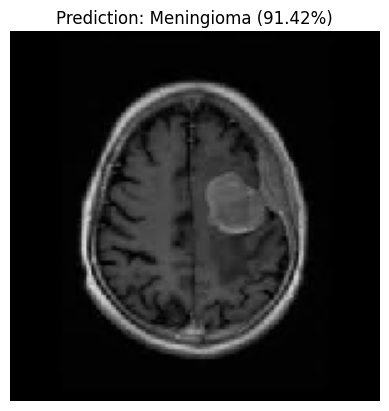

In [22]:


# Load and preprocess image
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_label = class_labels[predicted_index]
confidence = np.max(prediction) * 100

print(f"\nPredicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")


plt.imshow(img)
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.axis("off")
plt.show()